In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'covid19-es-and.csv'
fecha = '26/03/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/233729.html'

In [3]:
# Load 
tables = pd.read_html(url, header=0, index_col='Provincia', thousands='.')
assert len(tables) > 0
dfL = tables[0]
dfL

,Positivo,Ingresos,Seguimiento activo,Fallecimientos
Provincia,,,,
Almería,134,62,65,7
Cádiz,299,92,202,5
Córdoba,349,161,181,7
Granada,648,287,329,32
Huelva,95,52,41,2
Jaén,349,189,145,15
Málaga,905,490,373,42
Sevilla,627,293,310,24
Total,3406,1626,1646,134


In [4]:
# Prepare
provincias = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Total']
dfP = pd.DataFrame(0, index=provincias, columns=['Ingresados','Altas', 'Bajas'])

dfP['Ingresados'] = dfL['Ingresos']
dfP['Bajas'] = dfL['Fallecimientos']
dfP['Fecha'] = fecha

dfP

,Ingresados,Altas,Bajas,Fecha
Almería,62,0,7,26/03/2020
Cádiz,92,0,5,26/03/2020
Córdoba,161,0,7,26/03/2020
Granada,287,0,32,26/03/2020
Huelva,52,0,2,26/03/2020
Jaén,189,0,15,26/03/2020
Málaga,490,0,42,26/03/2020
Sevilla,293,0,24,26/03/2020
Total,1626,0,134,26/03/2020


In [5]:
# Save to csv
dfP.to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [6]:
# Load full csv
dfCSV = pd.read_csv(filename, index_col='Provincia', thousands='.')

In [7]:
# Select & calc
title = 'COVID19 Andalucía'
total = dfCSV.loc['Total']['Ingresados'].pct_change() * 100
huelva = dfCSV.loc['Huelva']['Ingresados'].pct_change() * 100
malaga  = dfCSV.loc['Málaga']['Ingresados'].pct_change() * 100
# x Axis
xA = dfCSV.loc['Total']['Fecha']

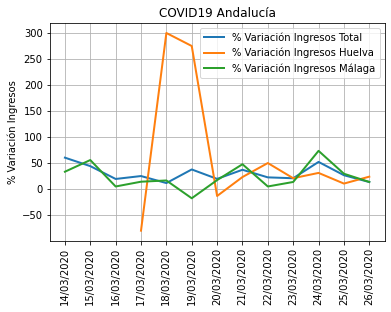

In [8]:
# Draw 
plt.plot(xA, total, label='% Variación Ingresos Total', linewidth=2)
plt.plot(xA, huelva, label='% Variación Ingresos Huelva', linewidth=2)
plt.plot(xA, malaga, label='% Variación Ingresos Málaga', linewidth=2)
plt.title(title)
plt.ylabel('% Variación Ingresos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()